# Import libraries and mount drive

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
listings = pd.read_csv('/content/drive/MyDrive/Data_science/Data_Management_and_Visualization/FinalExam/Shared_DMV_Project/listings2024.csv')

In [4]:
calendar = pd.read_csv('/content/drive/MyDrive/Data_science/Data_Management_and_Visualization/FinalExam/Shared_DMV_Project/calendar2024.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Data_science/Data_Management_and_Visualization/FinalExam/Shared_DMV_Project/reviews2024.csv')

# Data Exploration (listings)

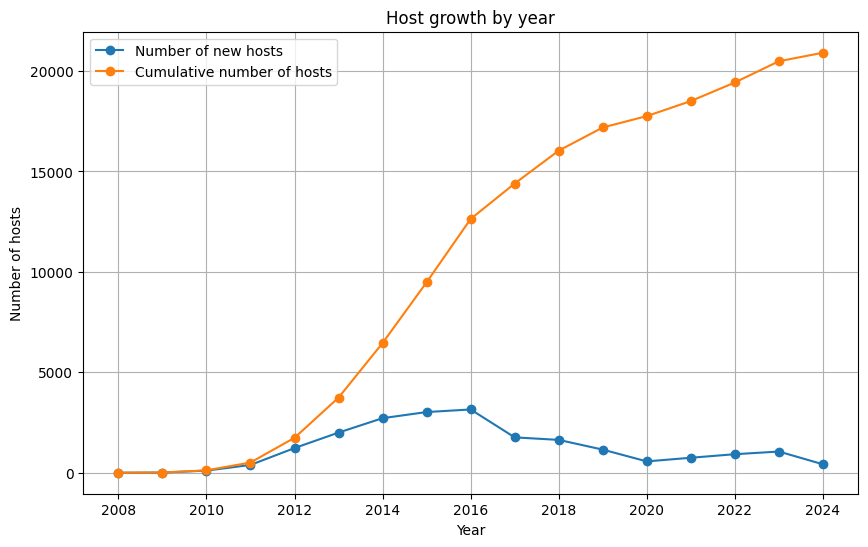

In [10]:
listings['host_since'] = pd.to_datetime(listings['host_since']) # Convert to datetime
listings['year'] = listings['host_since'].dt.year # Extract year

id_counts_by_year = listings.groupby('year')['id'].nunique().reset_index()

# Calculate cumulative sum of distinct IDs
id_counts_by_year['cumulative_ids'] = id_counts_by_year['id'].cumsum()

# Plot the data with cumulative line
plt.figure(figsize=(10, 6))
plt.plot(id_counts_by_year['year'], id_counts_by_year['id'], marker='o', label='Number of new hosts')
plt.plot(id_counts_by_year['year'], id_counts_by_year['cumulative_ids'], marker='o', label='Cumulative number of hosts')
plt.title('Host growth by year')
plt.xlabel('Year')
plt.ylabel('Number of hosts')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
print(f'There are {listings.shape[0]} observations in the listings DataFrame.')
print(f'There are {listings.shape[1]} variables in the listings DataFrame.')

There are 20909 observations in the listings DataFrame.
There are 75 variables in the listings DataFrame.


## Null values

In [6]:
# Display information about null values in each DataFrame, showing only columns with non-zero sums.
print("Listings Null Values:")
null_values = listings.isnull().sum()

# Calculate the percentage of null values for each column
total_rows = len(listings)
null_percent = (null_values / total_rows) * 100

# Combine into a DataFrame for better readability
null_info = pd.DataFrame({
    'Null_Count': null_values,
    'Null_Percentage': null_percent.round(2)
})

# Filter to show only columns with non-zero null counts
null_info = null_info[null_info['Null_Count'] > 0]

# Sort the null_info DataFrame by 'Null Count' in descending order
null_info_sorted = null_info.sort_values(by=['Null_Count'], ascending=False)

print('There are ', len(null_info), 'columns with non-zero null counts.')
print(print(null_info_sorted))

Listings Null Values:
There are  38 columns with non-zero null counts.
                              Null_Count  Null_Percentage
neighbourhood_group_cleansed       20909           100.00
license                            20909           100.00
calendar_updated                   20909           100.00
host_neighbourhood                 15492            74.09
host_about                         12043            57.60
neighborhood_overview              11925            57.03
neighbourhood                      11925            57.03
price                               7313            34.98
beds                                7249            34.67
bathrooms                           7249            34.67
host_response_rate                  6468            30.93
host_response_time                  6468            30.93
host_acceptance_rate                3748            17.93
host_location                       3429            16.40
review_scores_location              3245            15.52
r

### Null value analysis

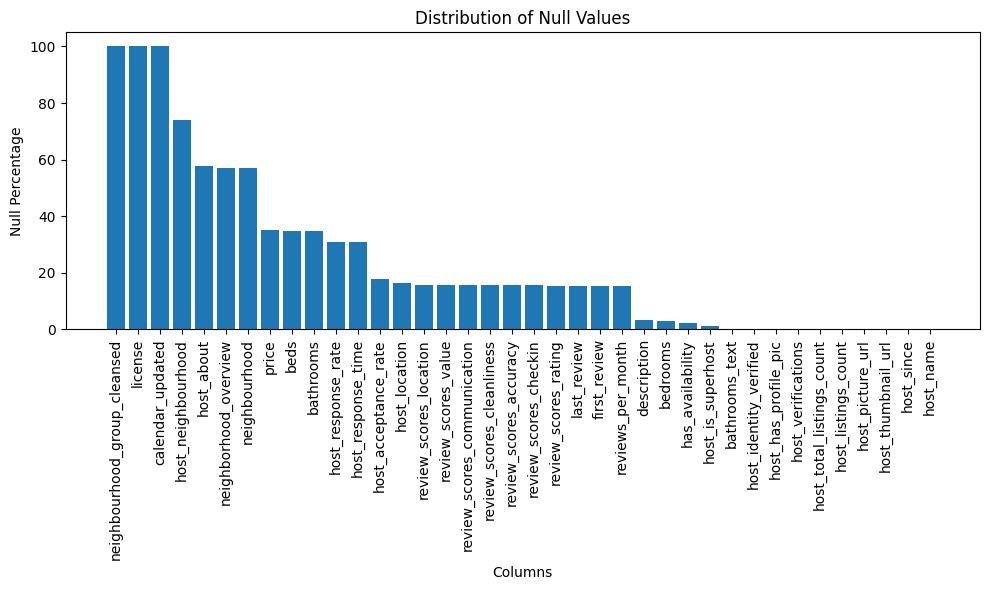

In [7]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(null_info_sorted.index, null_info_sorted['Null_Percentage'])
plt.xlabel("Columns")
plt.ylabel("Null Percentage")
plt.title("Distribution of Null Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
# Entries with more than 4 null values
entries_with_many_nulls = listings[listings.isnull().sum(axis=1) > 4]

entries_with_many_nulls

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,31094,https://www.airbnb.com/rooms/31094,20240629155650,2024-06-30,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.11
1,262961,https://www.airbnb.com/rooms/262961,20240629155650,2024-06-30,city scrape,192m2 FLAT+ 8m2 BALCONY IN CENTER NØRREBRO HOOD,If you are looking for a large apartment in ce...,TIME OUT - The world’s coolest neighbourhoods ...,https://a0.muscache.com/pictures/261aa506-7b13...,1379904,...,4.94,4.89,4.53,NaN,f,1,1,0,0,0.24
2,263036,https://www.airbnb.com/rooms/263036,20240629155650,2024-06-30,city scrape,Bright flat in central location,NaN,NaN,https://a0.muscache.com/pictures/17770169/f1fb...,1232471,...,4.86,4.81,4.67,NaN,f,1,1,0,0,0.14
4,263708,https://www.airbnb.com/rooms/263708,20240629155650,2024-06-30,city scrape,Urban garden on Vesterbro rooftop,NaN,NaN,https://a0.muscache.com/pictures/8ce36f40-ac59...,1383888,...,5.00,4.67,4.00,NaN,f,1,1,0,0,0.02
5,264220,https://www.airbnb.com/rooms/264220,20240629155650,2024-06-30,previous scrape,MY HOME IN FANTASTIC COPENHAGEN,NaN,NaN,https://a0.muscache.com/pictures/14521791/edef...,1386103,...,4.00,4.25,3.50,NaN,f,4,0,2,2,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20904,1189068003466882100,https://www.airbnb.com/rooms/1189068003466882100,20240629155650,2024-06-30,city scrape,Central lejlighed tæt på metro,Lovely centrally located apartment just 150 me...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,466515178,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
20905,1188291058700847695,https://www.airbnb.com/rooms/1188291058700847695,20240629155650,2024-06-29,city scrape,Hyggeligt hus i haveforening,This small oasis in the city contains a large ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,8134165,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
20906,1189086099059352914,https://www.airbnb.com/rooms/1189086099059352914,20240629155650,2024-06-30,city scrape,Charming design loft in Elmegade,Welcome to our wonderful loft overlooking Cope...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2323542,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
20907,1188302911099164911,https://www.airbnb.com/rooms/1188302911099164911,20240629155650,2024-06-29,city scrape,lejlighed tæt på strand og byliv,Welcome to our spacious 3-bedroom apartment in...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,329377118,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


# Converting and fixing structural errors (listings)

## Ensuring boolean columns are properly treated as a boolean

In [9]:
# Ensure 'host_is_superhost' column is properly treated as boolean
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': True, 'f': False})

# Ensure 'host_has_profle_pic' column is properly treated as boolean
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t': True, 'f': False})

# Ensure 'host_identity_verified' column is properly treated as boolean
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': True, 'f': False})

# Ensure 'host_identity_verified' column is properly treated as boolean
listings['instant_bookable'] = listings['instant_bookable'].map({'t': True, 'f': False})


## Dropping missing value columns

In [10]:
# Drop columns with more than 99% missing values
threshold = 0.99
columns_to_drop = listings.columns[listings.isnull().mean() > threshold]
listings = listings.drop(columns=columns_to_drop)

### Clean text columns: host_about, description, description_length, neighbourhood_overview, amenities_count, neighbourhood_cleansed
Removing entries containing only signs

In [11]:
# Replace entries in 'host_about' that contain only signs with NaN
listings['host_about'] = listings['host_about'].apply(
    lambda x: np.nan if isinstance(x, str) and re.fullmatch(r'[^\w]*', x.strip()) else x
)

In [12]:
# Replace entries in 'description' that contain only signs with NaN
listings['description'] = listings['description'].apply(
    lambda x: np.nan if isinstance(x, str) and re.fullmatch(r'[^\w]*', x.strip()) else x
)

In [13]:
# Replace entries in 'description' that contain only signs with NaN
listings['neighborhood_overview'] = listings['neighborhood_overview'].apply(
    lambda x: np.nan if isinstance(x, str) and re.fullmatch(r'[^\w]*', x.strip()) else x
)
# Correcting name from neighborhood to neighbourhood for uniformness
listings.rename(columns={'neighborhood_overview': 'neighbourhood_overview'}, inplace=True)

In [14]:
# Create description_length field
listings['description_length'] = listings['description'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

In [15]:
import ast

# Create amenities_count field
listings['amenities_count'] = listings['amenities'].apply(
    lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0
)

In [16]:
# Correct neighbourhood names
neighbourhood_mapping = {
    'Vesterbro-Kongens Enghave': 'Vesterbro-Kongens Enghave',
    'Nrrebro': 'Nørrebro',
    'Amager st': 'Amager Øst',
    'sterbro': 'Østerbro',
    'Indre By': 'Indre By',
    'Bispebjerg': 'Bispebjerg',
    'Amager Vest': 'Amager Vest',
    'Valby': 'Valby',
    'Frederiksberg': 'Frederiksberg',
    'Vanlse': 'Vanløse',
    'Brnshj-Husum': 'Brønshøj-Husum'
}

# Replace the values in the 'neighbourhood_cleansed' column with the correct names
listings['neighbourhood_cleansed'] = listings['neighbourhood_cleansed'].replace(neighbourhood_mapping)

### Clean integer columns: host_response_rate, host_acceptance_rate, id
Remove "%" sign, convert to float

In [17]:
# Remove % sign
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%')
# Convert to float
listings['host_response_rate'] = listings['host_response_rate'].astype(float)

In [18]:
# Convert id to integer
listings['id'] = listings['id'].astype(int)

In [19]:
# Remove % sign
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%')
# Convert to float
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype(float)

In [20]:
# Remove dollarsign and turn into float
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)
# Set entries with price as 0 to NaN
listings.loc[listings['price'] == 0, 'price'] = np.nan
# Change name to price_dkk
listings.rename(columns={'price': 'price_dkk'}, inplace=True)

In [21]:
# Convert bedrooms with NaN to 0
listings['bedrooms'] = listings['bedrooms'].fillna(0)
# Convert to integer
listings['bedrooms'] = listings['bedrooms'].astype(int)

### Identifying and dropping rows with too many missing variables

In [22]:
# Select row with missing value in "host_since"
# Drop rows where "host_since" is missing
listings = listings.dropna(subset=['host_since'])

In [23]:
# number_of_reviews_ltm sorted descending
listings_avg_view = listings.sort_values(by='number_of_reviews_ltm', ascending=False)
listings_avg_view['number_of_reviews_ltm']

# Print count of listings with 0 'number_of_reviews_ltm'
print(f'There are {listings[listings["number_of_reviews_ltm"] == 0].shape[0]} listings with 0 reviews.')


There are 6814 listings with 0 reviews.


48.0
Average (capped at 95th percentile, not excluding 0s): 4.877224029079778


Text(0.5, 0, 'number_of_reviews_ltm')

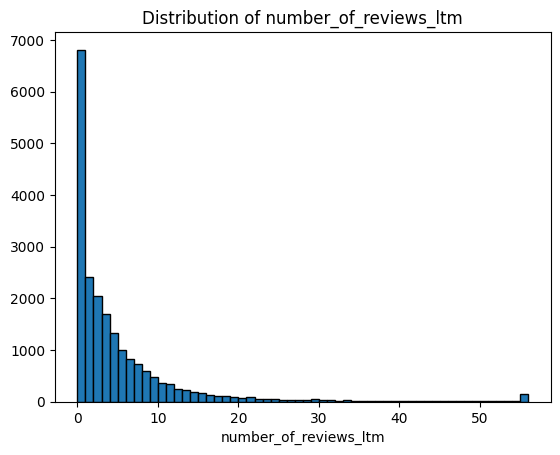

In [30]:
# Step 1: Filter out rows where number_of_reviews_ltm is 0
avg_filter = listings['number_of_reviews_ltm']

# Step 2: Compute the 95th percentile
p95 = avg_filter.quantile(0.99) #Access the values in the Series directly.
print(p95)
# Step 3: Cap values above the 95th percentile
avg_filter_capped = np.where(
    avg_filter > 56,
    56,
    avg_filter
)
#Store capped values in a new variable

# Step 4: Calculate the average of the capped values
average_capped = avg_filter_capped.mean() # Calculate the mean of the capped values

print(f"Average (capped at 95th percentile, not excluding 0s): {average_capped}")

# Histogram of average_capped
plt.hist(avg_filter_capped, bins=56, edgecolor='black') #Plot the capped values
plt.title('Distribution of number_of_reviews_ltm')
plt.xlabel('number_of_reviews_ltm')

56.0
Average (capped at 95th percentile, excluding 0s): 7.235206470838655


<ipython-input-25-789fea59a0a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_filter['number_of_reviews_ltm_capped'] = np.where(


Text(0.5, 0, 'number_of_reviews_ltm')

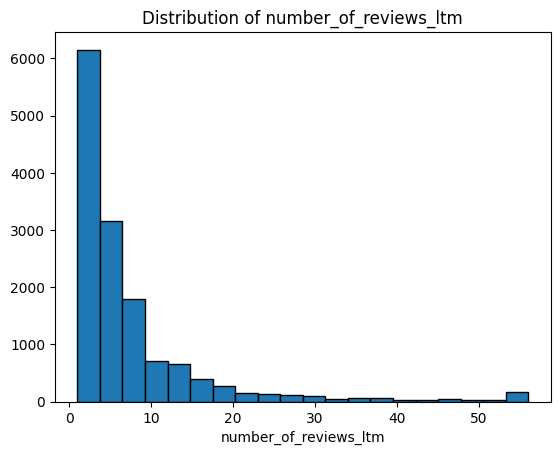

In [25]:
# Step 1: Filter out rows where number_of_reviews_ltm is 0
avg_filter = listings[listings['number_of_reviews_ltm'] != 0]

# Step 2: Compute the 95th percentile
p95 = avg_filter['number_of_reviews_ltm'].quantile(0.99)
print(p95)
# Step 3: Cap values above the 95th percentile
avg_filter['number_of_reviews_ltm_capped'] = np.where(
    avg_filter['number_of_reviews_ltm'] > p95,
    p95,
    avg_filter['number_of_reviews_ltm']
)

# Step 4: Calculate the average of the capped values
average_capped = avg_filter['number_of_reviews_ltm_capped'].mean()

print(f"Average (capped at 95th percentile, excluding 0s): {average_capped}")

# Histogram of average_capped
plt.hist(avg_filter['number_of_reviews_ltm_capped'], bins=20, edgecolor='black')
plt.title('Distribution of number_of_reviews_ltm')
plt.xlabel('number_of_reviews_ltm')

In [26]:
# Step 1: Filter out rows where number_of_reviews_ltm is 0
avg_filter = listings[listings['number_of_reviews_ltm'] != 0]

# Step 2: Filter using 1,5 IQR



# Step 4: Calculate the average of the capped values
average_capped = avg_filter['number_of_reviews_ltm_capped'].mean()

print(f"Average (capped at 95th percentile, excluding 0s): {average_capped}")

# Histogram of average_capped
plt.hist(avg_filter['number_of_reviews_ltm_capped'], bins=20, edgecolor='black')
plt.title('Distribution of number_of_reviews_ltm')
plt.xlabel('number_of_reviews_ltm')

KeyError: 'number_of_reviews_ltm_capped'

# Creating clean df

In [ ]:
# Define the columns to keep
columns_to_keep = [
    'id', 'accommodates', 'amenities_count', 'availability_365', 'bedrooms',
    'calculated_host_listings_count', 'description', 'host_about',
    'host_acceptance_rate', 'host_has_profile_pic', 'host_identity_verified',
    'host_is_superhost', 'host_response_rate', 'host_response_time',
    'instant_bookable', 'neighbourhood_cleansed', 'neighbourhood_overview',
    'number_of_reviews_ltm', 'price_dkk', 'reviews_per_month', 'review_scores_accuracy',
    'review_scores_checkin', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_location',
    'review_scores_rating', 'review_scores_value', 'room_type', 'property_type'
]

# Create a new DataFrame with only the selected columns
listings_cleaned = listings[columns_to_keep]
listings_original  = listings
listings = listings[columns_to_keep]


# Print amount of columns in listings_cleaned
print(f'There are {listings_cleaned.shape[1]} variables in the listings_cleaned DataFrame.')

# Export to a CSV file
listings_cleaned.to_csv('listings_cleaned.csv', index=False)
# Download file
from google.colab import files
files.download('listings_cleaned.csv')

# Print confirmation
print("Filtered data saved to 'listings_cleaned.csv'")

# Data analysis

# Differences between superhosts and non-superhosts
*Not completed, only checked a few variables

## Hypothesis: Superhosts will have fewer null-values because they are more inclined to fill out their listings

In [ ]:
# Separate the data into superhosts and non-superhosts
superhost_data = listings[listings['host_is_superhost'] == True]
non_superhost_data = listings[listings['host_is_superhost'] == False]

# Calculate the total null values and percentage null values for each group
superhost_nulls = superhost_data.isnull().sum()
superhost_total = len(superhost_data)
superhost_null_percentage = (superhost_nulls / superhost_total) * 100

non_superhost_nulls = non_superhost_data.isnull().sum()
non_superhost_total = len(non_superhost_data)
non_superhost_null_percentage = (non_superhost_nulls / non_superhost_total) * 100

# Create a comparison DataFrame
null_comparison_percentage = pd.DataFrame({
    'Superhost Null %': superhost_null_percentage,
    'Non-Superhost Null %': non_superhost_null_percentage
})

# Add a column to indicate the difference in null percentages
null_comparison_percentage['Difference (Non-Superhost - Superhost) %'] = null_comparison_percentage['Non-Superhost Null %'] - null_comparison_percentage['Superhost Null %']
null_comparison_percentage_sorted = null_comparison_percentage.sort_values(by=['Difference (Non-Superhost - Superhost) %'], ascending=False)
null_comparison_percentage_sorted_non_null = null_comparison_percentage_sorted[null_comparison_percentage_sorted['Difference (Non-Superhost - Superhost) %'] != 0]

# Display the comparison DataFrame
print(null_comparison_percentage_sorted_non_null)


In [ ]:
# percent if null values for each column in listings

# Calculate null value percentages for each column
null_percentages = (listings.isnull().sum() / len(listings)) * 100

# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column': null_percentages.index, 'Null Percentage': null_percentages.values})
# Descending by null percentage
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)

# Print the DataFrame
print(null_percentage_df)

Many of these variables are not connected to if they have filled out their listing or not, however there are some interesting findings.
1. Superhosts are 17,68% more likely to have filled the "neighbourhood" box
2. Superhosts are 12,28% more likely to have filled the "host_about" box

In [ ]:
# Separate the data into superhosts and non-superhosts
superhost_data = listings[listings['host_is_superhost'] == True]
non_superhost_data = listings[listings['host_is_superhost'] == False]
# Average number of reviews for these
# print(superhost_avg_reviews = superhost_data['number_of_reviews_ltm'].mean())
# print(non_superhost_avg_reviews = non_superhost_data['number_of_reviews_ltm'].mean())

In [ ]:
# Interesting columns for host analysis
# relevant_host_columns = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified']

# describe the columns
# host_description = listings[relevant_host_columns].describe(include='all')

# Display the description
# print(host_description)

## Host response time
Due to values being categorical (within 1hr, within a few hours, within a few days etc.), it doesn't make sense to do numerical analysis other than count analysis. (Mapping to numerical values would be skewed because of the difference between 1hour and 48hours)

In [ ]:

# Separate the data into superhosts and non-superhosts
superhost_data = listings[listings['host_is_superhost'] == True]
non_superhost_data = listings[listings['host_is_superhost'] == False]

value_counts_super_hosts = superhost_data['host_response_time'].value_counts(dropna=False)
value_counts_non_super_hosts = non_superhost_data['host_response_time'].value_counts(dropna=False)

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({
    'Superhosts': value_counts_super_hosts,
    'Non-Superhosts': value_counts_non_super_hosts
})

# Replace NaN index with 'NaN' for clarity, if it exists
combined_counts = combined_counts.rename(index={np.nan: 'NaN'})

# Calculate percentage columns
combined_counts['Superhosts %'] = (combined_counts['Superhosts'] / combined_counts['Superhosts'].sum()) * 100
combined_counts['Non-Superhosts %'] = (combined_counts['Non-Superhosts'] / combined_counts['Non-Superhosts'].sum()) * 100

# Calculate difference
combined_counts['Difference (Non-Superhost - Superhost) %'] = combined_counts['Non-Superhosts %'] - combined_counts['Superhosts %']

# Round percentage values to 2 decimal places for readability
combined_counts = combined_counts.round(2)

print(combined_counts)




Findings:
1. Superhosts are 28,2% more likely to respond within an hour
2. Superhosts respond quicker to messages in general

# Booked days ratio

In [ ]:
# id column to integer
calendar['listing_id'] = calendar['listing_id'].astype(int)
listings['id'] = listings['id'].astype(int)

In [ ]:
# Step 1: Sum the number of entries for each `listing_id` in the calendar dataset
calendar_sums = calendar.groupby('listing_id').size().reset_index(name='booking_count')

# Step 2: Merge the calculated sums into the listings dataset
listings = listings.merge(calendar_sums, left_on='id', right_on='listing_id', how='left')

#


In [ ]:
# Create line graph using calendar df with dates on the x-axis and sum of available listings on the Y-axis
# Ensure the 'date' column is in datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

# Group by date and calculate the sum of available listings
available_listings_by_date = calendar.groupby('date')['available'].apply(lambda x: (x == 't').sum())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(available_listings_by_date.index, available_listings_by_date.values, label='Available Listings', color='blue')
plt.title('Sum of Available Listings Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sum of Available Listings', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Merge calendar with listings on 'listing_id' (or appropriate ID column)
calendar = calendar.merge(listings[['id', 'accommodates']], left_on='listing_id', right_on='id', how='left')

# Create the 'bednights' variable
calendar['bednights'] = calendar['accommodates'] * (calendar['available'] == 't')

# Group by date and calculate the total 'bednights'
bednights_by_date = calendar.groupby('date')['bednights'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(bednights_by_date.index, bednights_by_date.values, label='Total Bednights', color='green')
plt.title('Total Bednights Available Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Bednights Available', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average availability per listing per date
calendar['is_available'] = (calendar['available'] == 't').astype(int)
avg_availability_by_date = calendar.groupby('date')['is_available'].mean()


# Normalize the average availability to match the scale of total bednights
normalized_avg_availability = avg_availability_by_date * (bednights_by_date.max() / avg_availability_by_date.max())

# Plot the data
plt.figure(figsize=(12, 6))

# Plot total bednights
plt.plot(bednights_by_date.index, bednights_by_date.values, label='Total Bednights', color='green')

# Plot normalized average availability
plt.plot(normalized_avg_availability.index, normalized_avg_availability.values, label='Normalized Average Availability per Listing', color='blue')

# Customize the plot
plt.title('Comparison of Total Bednights and Average Availability per Listing Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values (Normalized)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
 #clean_booked_ratio = listings['booked_ratio'].dropna()

In [ ]:
clean_booked_ratio.count()

We need to weigh using the ratio as a measure or using the booking_count as measure.

In [ ]:
# Create a summary table for number of listings vs number of reviews (from listings) thresholds
booking_thresholds = range(0, 51)  # Booking count thresholds from 0 to 50
listings_count = listings['number_of_reviews_ltm'].fillna(0)
listings_count = [listings[listings['number_of_reviews_ltm'] >= x].shape[0] for x in booking_thresholds]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(booking_thresholds, listings_count, marker='o')
plt.title('Impact of number of reviews Threshold on Number of reviews')
plt.xlabel('Minimum number of review Threshold')
plt.ylabel('Number of listings')
plt.grid(True)

# A verticle line at 50% of total number of reviews
plt.axvline(x=3, color='r', linestyle='--')

# A horizontal line at 50% of number of listings
plt.axhline(y=listings.shape[0]/2, color='g', linestyle='--')


plt.show()
print(f'The y-value at x = 5 is {listings_count[5]}')


In [ ]:
#filtered_listings = listings[listings['number_of_reviews_ltm'] >= 2]
#print(results.describe())
#print(f'There are {results.shape[0]} observations in the listings DataFrame.')

In [ ]:
# Define threshold for booking count
threshold = 5

# Filter listings based on threshold
filtered_listings = listings[listings['number_of_reviews_ltm'] >= threshold].copy()
excluded_listings = listings[listings['number_of_reviews_ltm'] < threshold].copy()

# The sum ['number_of_review_ltm']
filtered_sum = filtered_listings['number_of_reviews_ltm'].sum()
excluded_sum = excluded_listings['number_of_reviews_ltm'].sum()

print(f'Listings with {threshold} or more reviews account for {filtered_sum} out of the total {filtered_sum+excluded_sum}, this is {round(filtered_sum/(filtered_sum+excluded_sum)*100,2)}%')
print((f'Listings with less than {threshold} reviews account for {excluded_sum} out of the total {filtered_sum+excluded_sum}, this is {round(excluded_sum/(filtered_sum+excluded_sum)*100,2)}%'))

In [ ]:
# Exclude outliers from listings['reviews_per_month']
Q1 = listings['reviews_per_month'].quantile(0.25)
Q3 = listings['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = listings['reviews_per_month'][(listings['reviews_per_month'] >= lower_bound) & (listings['reviews_per_month'] <= upper_bound)]
    # Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=10, edgecolor='black')
plt.title('Distribution of Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Number of Listings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Filter data to exclude outliers
filtered_listings = listings[listings['number_of_reviews_ltm'] <= 100]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_listings['availability_365'], filtered_listings['number_of_reviews_ltm'], alpha=0.5)
plt.title('Availability vs. Number of Reviews (LTM) - Excluding Outliers')
plt.xlabel('Availability (365 days)')
plt.ylabel('Number of Reviews (LTM)')
plt.grid(True)
plt.show()



In [ ]:
# Filter data to exclude outliers
filtered_listings = listings[listings['number_of_reviews_ltm'] <= 200]

# Filter for listings with more than 4 reviews
filtered_with_reviews = filtered_listings[filtered_listings['number_of_reviews_ltm'] > 4]

# Normalize the number of reviews for the gradient (min = 4 to max number of reviews)
norm = plt.Normalize(vmin=4, vmax=filtered_with_reviews['number_of_reviews_ltm'].max())

# Create the scatter plot with gradient colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    filtered_with_reviews['availability_365'],
    filtered_with_reviews['number_of_reviews_ltm'],
    c=filtered_with_reviews['number_of_reviews_ltm'],
    cmap='YlGn',  # Yellow to Green colormap
    norm=norm,
    alpha=0.7
)

# Add a colorbar to show the gradient scale
plt.colorbar(scatter, label='Number of Reviews (LTM)')

plt.title('Availability vs. Number of Reviews (LTM) - Gradient for >4 Reviews')
plt.xlabel('Availability (365 days)')
plt.ylabel('Number of Reviews (LTM)')
plt.grid(True)
plt.show()

In [ ]:
filtered_listings = listings[
    (listings['review_scores_rating'] > 4.5) & (listings['number_of_reviews_ltm'] <= 200) & (listings['number_of_reviews_ltm'] >= 10)
]

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_listings['availability_365'], filtered_listings['number_of_reviews_ltm'],
                      c=filtered_listings['review_scores_rating'], cmap='viridis', alpha=0.5)
plt.title('Availability vs. Number of Reviews (LTM) - Excluding Outliers')
plt.xlabel('Availability (365 days)')
plt.ylabel('Number of Reviews (LTM)')
plt.colorbar(scatter, label='Review Scores Rating')  # Add colorbar
plt.grid(True)
plt.show()

In [ ]:
filtered_listings_noblocked = filtered_listings[filtered_listings['availability_365'] > 100]
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_listings_noblocked['availability_365'], filtered_listings_noblocked['number_of_reviews_ltm'],
                      c=filtered_listings_noblocked['review_scores_rating'], cmap='viridis', alpha=0.5)
plt.title('Availability vs. Number of Reviews (LTM) - Excluding Outliers')
plt.xlabel('Availability (365 days)')
plt.ylabel('Number of Reviews (LTM)')
plt.colorbar(scatter, label='Review Scores Rating')  # Add colorbar
plt.grid(True)
plt.show()

In [ ]:
filtered_listings = listings[
    (listings['review_scores_rating'] > 3) & (listings['number_of_reviews_ltm'] <= 200)
]

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_listings['review_scores_rating'], filtered_listings['availability_365'],
                      alpha=0.5)
plt.title('Availability vs. Review scores - Excluding Outliers')
plt.xlabel('Review scores')
plt.ylabel('Availability (365 days)')
plt.grid(True)
plt.show()

In [ ]:
# Create treemap
import plotly.express as px
# Create labeled bins for 'number_of_reviews_ltm' (bins of 10) and 'availability_365' (bins of 30)
listings['reviews_bin'] = pd.cut(
    listings['number_of_reviews_ltm'],
    bins=range(0, listings['number_of_reviews_ltm'].max() + 10, 10),
    labels=[f'{i}-{i+9} reviews' for i in range(0, listings['number_of_reviews_ltm'].max(), 10)]
)

listings['availability_bin'] = pd.cut(
    listings['availability_365'],
    bins=range(0, listings['availability_365'].max() + 30, 30),
    labels=[f'{i}-{i+29} days' for i in range(0, listings['availability_365'].max(), 30)]
)

# Group by the labeled bins and calculate the count of listings in each bin combination
grouped = listings.groupby(['reviews_bin', 'availability_bin']).size().reset_index(name='count')

# Create treemap
fig = px.treemap(
    grouped,
    path=['availability_bin', 'reviews_bin'],  # Hierarchical levels
    values='count',                           # Size of the treemap rectangles
    title='Treemap of Number of Reviews vs Availability'
)
fig.show()

## Text analysis - description

### Not normalized

In [ ]:
import string
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing: Fill missing descriptions with an empty string
listings['description'] = listings['description'].fillna('').str.lower()

# Filter out irrelevant words
irrelevant_words = ['br']
listings['description'] = listings['description'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in irrelevant_words)
)

    # Remove punctuation
listings['description'] = listings['description'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)

    # Vectorize words in the description (removing stopwords)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
word_matrix = vectorizer.fit_transform(listings['description'])
words = vectorizer.get_feature_names_out()

    # Create a DataFrame with word counts
word_counts = pd.DataFrame(word_matrix.toarray(), columns=words)
word_counts['number_of_reviews_ltm'] = listings['number_of_reviews_ltm']

    # Calculate average reviews for each word
word_stats = pd.DataFrame({
    'average_reviews': word_counts.mean().loc[words],
    'total_occurrences': word_counts.sum().loc[words]
}).sort_values(by='average_reviews', ascending=False)

    # Display the top correlated words with the highest average reviews
print(word_stats.head(20))

### Normalized

In [ ]:
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing: Fill missing descriptions with an empty string
listings['description'] = listings['description'].fillna('').str.lower()

# Filter out irrelevant words
irrelevant_words = ['br']
listings['description'] = listings['description'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in irrelevant_words)
)

    # Remove punctuation
listings['description'] = listings['description'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)

# Use TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(listings['description'])
tfidf_words = vectorizer.get_feature_names_out()

    # Create a DataFrame with TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_words)
tfidf_df['number_of_reviews_ltm'] = listings['number_of_reviews_ltm']

# Calculate average reviews and occurrences for each word
tfidf_stats = pd.DataFrame({
    'average_reviews': (tfidf_df[tfidf_words].T * tfidf_df['number_of_reviews_ltm']).sum(axis=1) / tfidf_df[tfidf_words].sum(axis=0),
    'total_occurrences': tfidf_df[tfidf_words].sum(axis=0)
}).sort_values(by='average_reviews', ascending=False)

    # Display the top correlated words
print(tfidf_stats.head(20))

In [ ]:
# Select the top 10 words by average_reviews
top_words = tfidf_stats.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words.index, top_words['average_reviews'], color='skyblue')
plt.xlabel('Average Reviews')
plt.ylabel('Words')
plt.title('Top Description Words Correlated with Average Reviews')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Text analysis - reviews

In [ ]:
# Join reviews table to listing table
reviews['listing_id'] = reviews['listing_id'].astype(str)
listings['id'] = listings['id'].astype(str)
reviews_merged = listings.merge(reviews, left_on='id', right_on='listing_id', how='inner')
print(reviews_merged['listing_id'].nunique())



In [ ]:
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing: Fill missing descriptions with an empty string
reviews_merged['comments'] = reviews_merged['comments'].fillna('').str.lower()

# Filter out irrelevant words
irrelevant_words = ['br']
reviews_merged['comments'] = reviews_merged['comments'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in irrelevant_words)
)

    # Remove punctuation
reviews_merged['comments'] = reviews_merged['comments'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)

# Use TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(reviews_merged['comments'])
tfidf_words = vectorizer.get_feature_names_out()

    # Create a DataFrame with TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_words)
tfidf_df['number_of_reviews_ltm'] = reviews_merged['number_of_reviews_ltm']

# Calculate average reviews and occurrences for each word
tfidf_stats = pd.DataFrame({
    'average_reviews': (tfidf_df[tfidf_words].T * tfidf_df['number_of_reviews_ltm']).sum(axis=1) / tfidf_df[tfidf_words].sum(axis=0),
    'total_occurrences': tfidf_df[tfidf_words].sum(axis=0)
}).sort_values(by='average_reviews', ascending=False)

    # Display the top correlated words
print(tfidf_stats.head(20))

In [ ]:
# Select the top 10 words by average_reviews
top_words = tfidf_stats[tfidf_stats['average_reviews'] < 500]
top_words = top_words.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words.index, top_words['average_reviews'], color='skyblue')
plt.xlabel('Average Reviews')
plt.ylabel('Words')
plt.title('Top Review Words Correlated with Average Reviews')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation coefficient

In [ ]:
# Filter for columns with float values only
float_columns = listings.select_dtypes(include=['float64', 'boolean', 'integer'])

# Calculate Spearman correlation for "number_of_reviews_ltm" with all float variables
correlations = float_columns.corr(method='spearman')['number_of_reviews_ltm'].sort_values(ascending=False)

# Convert to a list of tuples (variable, correlation) in descending order
print(correlations)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(correlations.index, correlations.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variables')
plt.ylabel('Correlation with "number_of_reviews_ltm"')
plt.title('Correlation of Variables with "number_of_reviews_ltm"')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Group data by host_is_superhost and calculate the mean number of bookings
grouped = listings.groupby('host_is_superhost')['number_of_reviews_ltm'].mean()

# Print the mean number of bookings for each group
print("Average number of bookings (LTM):")
print(grouped)

# Perform a t-test to compare superhosts and non-superhosts
superhost_bookings = listings[listings['host_is_superhost'] == True]['number_of_reviews_ltm']
non_superhost_bookings = listings[listings['host_is_superhost'] == False]['number_of_reviews_ltm']
t_stat, p_value = ttest_ind(superhost_bookings, non_superhost_bookings, equal_var=False)

print(f"\nT-test results:\nT-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Visualize the results using a bar plot
plt.figure(figsize=(8, 5))
grouped.plot(kind='bar', color=['teal', 'pink'], alpha=0.7)
plt.title('Average Number of Reviews (LTM) by Superhost Status')
plt.xlabel('Host is Superhost')
plt.ylabel('Average Number of reviews (LTM)')
plt.xticks(ticks=[0, 1], labels=['Non-Superhost', 'Superhost'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()